In [1]:
import os
import sys
sys.path.append(os.getcwd() + '/src')
from nodes import *
from visualizer.individualvisualizer import IndividualVisualizer
from ea import EA
import pdb
import pickle
import gym
from history import History
#pdb.set_trace()


In [2]:
hist = History()
hist.load('out/bipedout_re200')

#remove unconnected neurons

0.6995176663862486

In [13]:
from analyzer import *
a = Analyzer(hist)
nn = hist.bests[5].execute()
a.Q_metric(5)

0.5828402366863905

In [5]:
task = hist.tasks[0]
i = -1
env = gym.make(task)
#env.seed(seed=hist.seeds[i])
hist.bests[i].compile()
nn = hist.bests[i].execute()
obs = env.reset()
done = False
totalReward = 0
obs = env.reset()
while (not done):
    if (task == 'CartPole-v1'):
        action = nn.step(obs)[0]
        if (action > 0):
            action = 1
        else:
            action = 0
    else:
        action = nn.step(obs) * env.action_space.high
    new_obs, reward, done, info = env.step(action)
    totalReward += reward
    if (max(abs((new_obs - obs))) < 1e-5):
        break
    obs = new_obs
    env.render()
env.close()
print(totalReward)

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


21.62591007171629


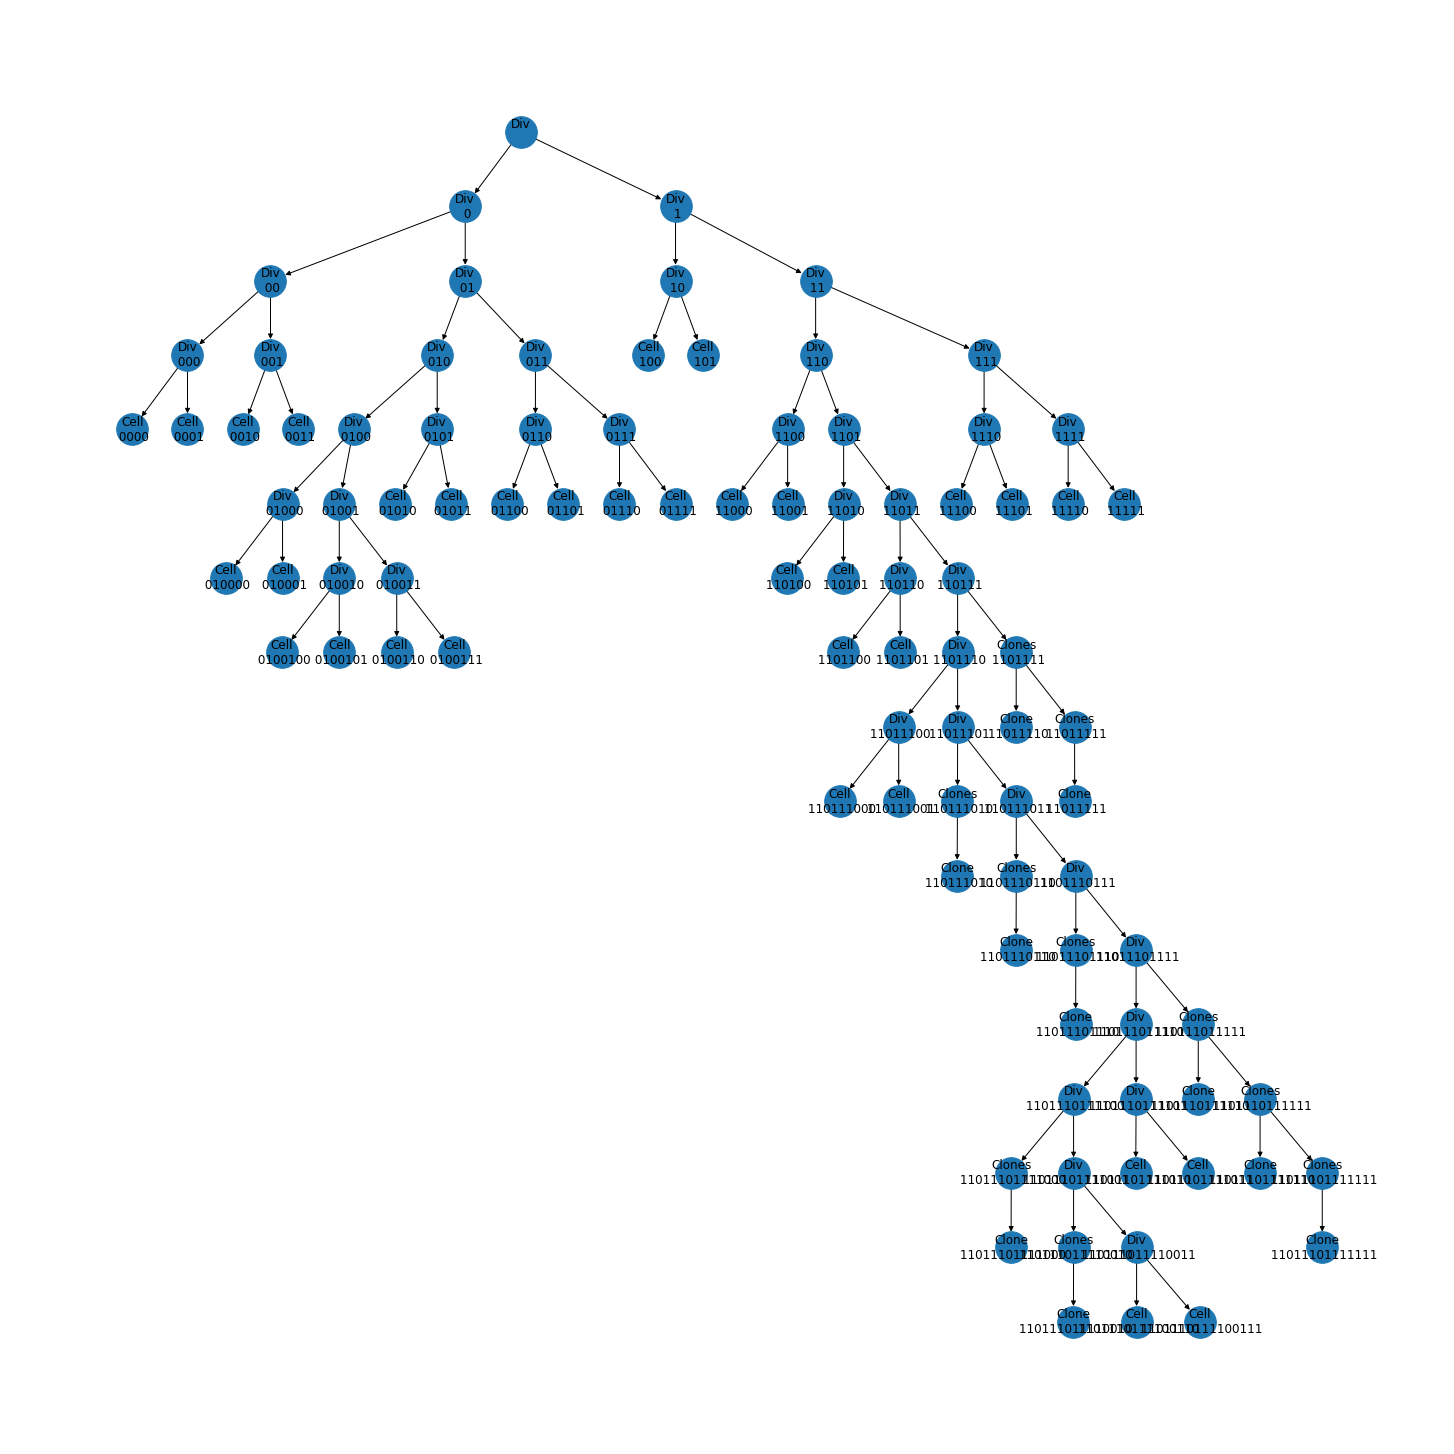

In [3]:
r1 = hist.bests[-1]
r2 = hist.bests[-1]
v1 = IndividualVisualizer(r1)
v2 = IndividualVisualizer(r2)
r1.compile()
r2.compile()
v1.draw_tree()

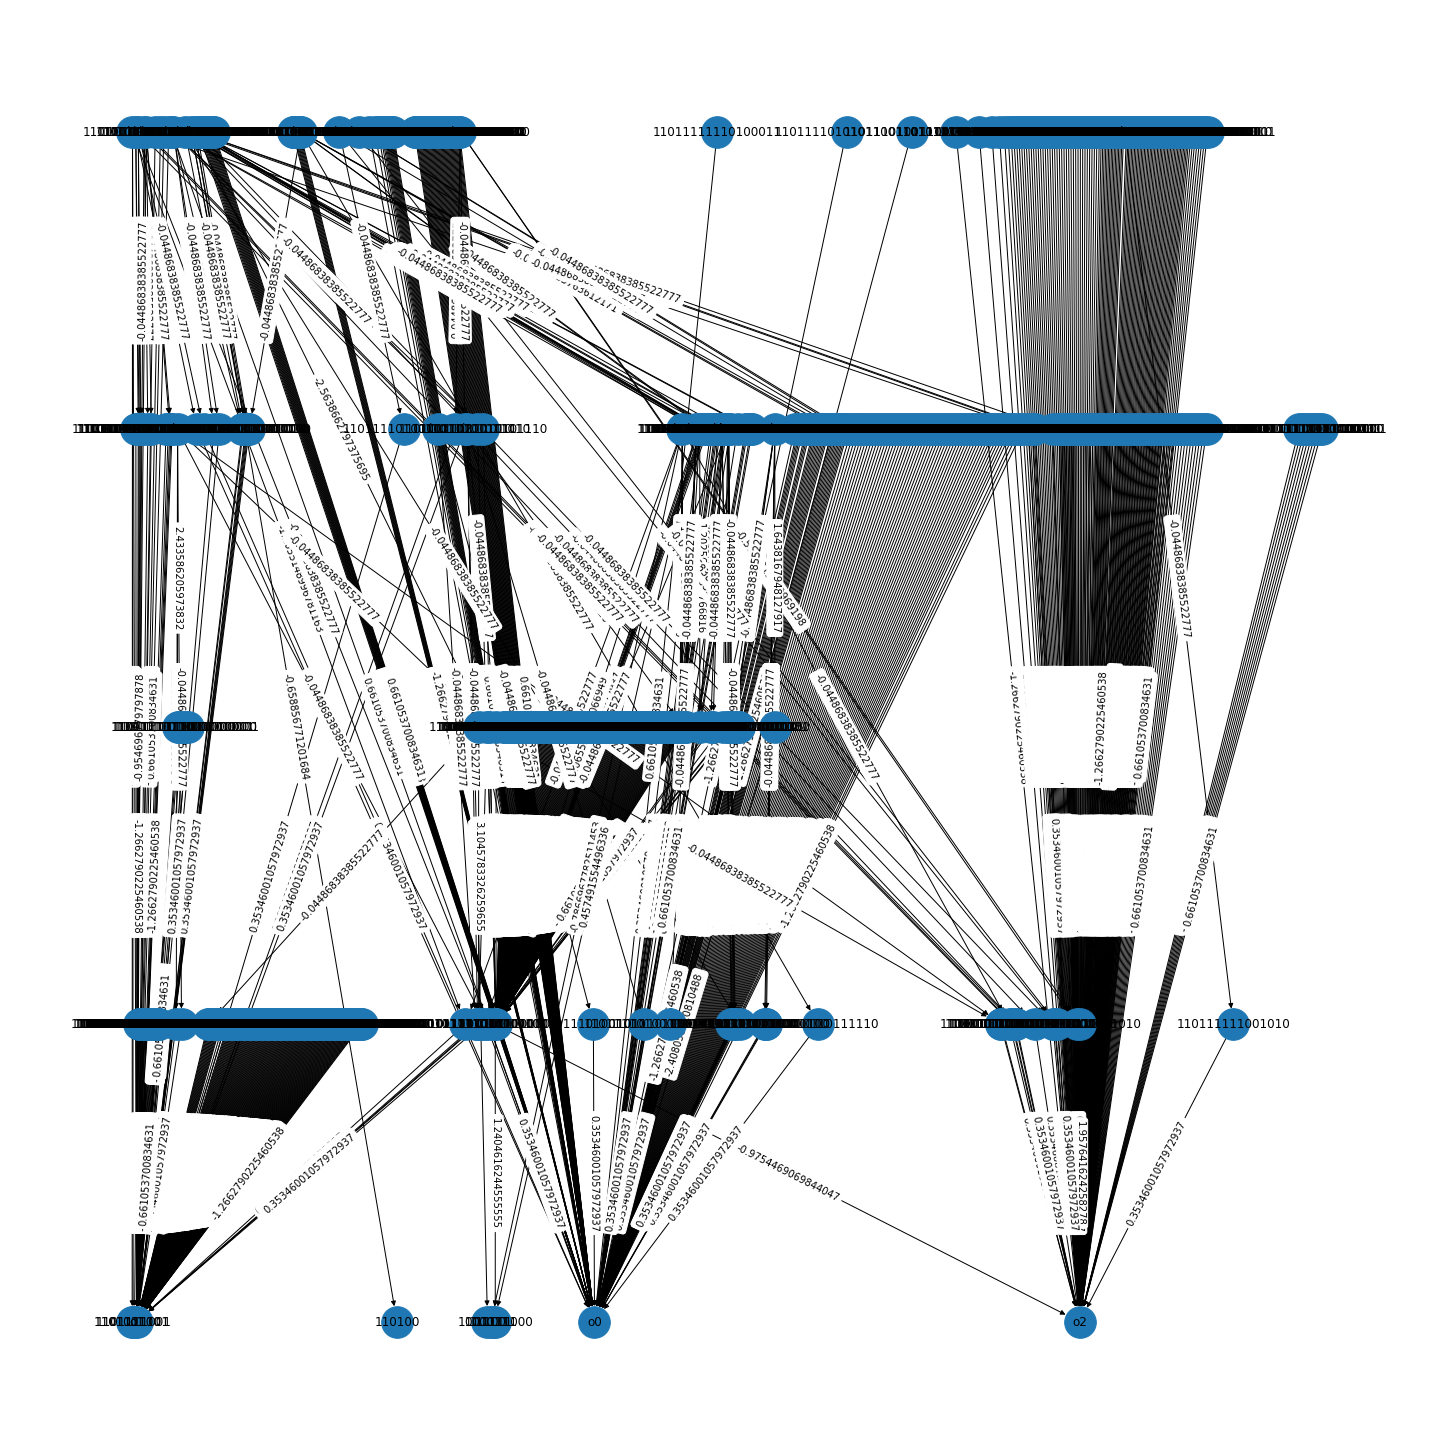

In [4]:
r1.execute()
v1.draw_nn()

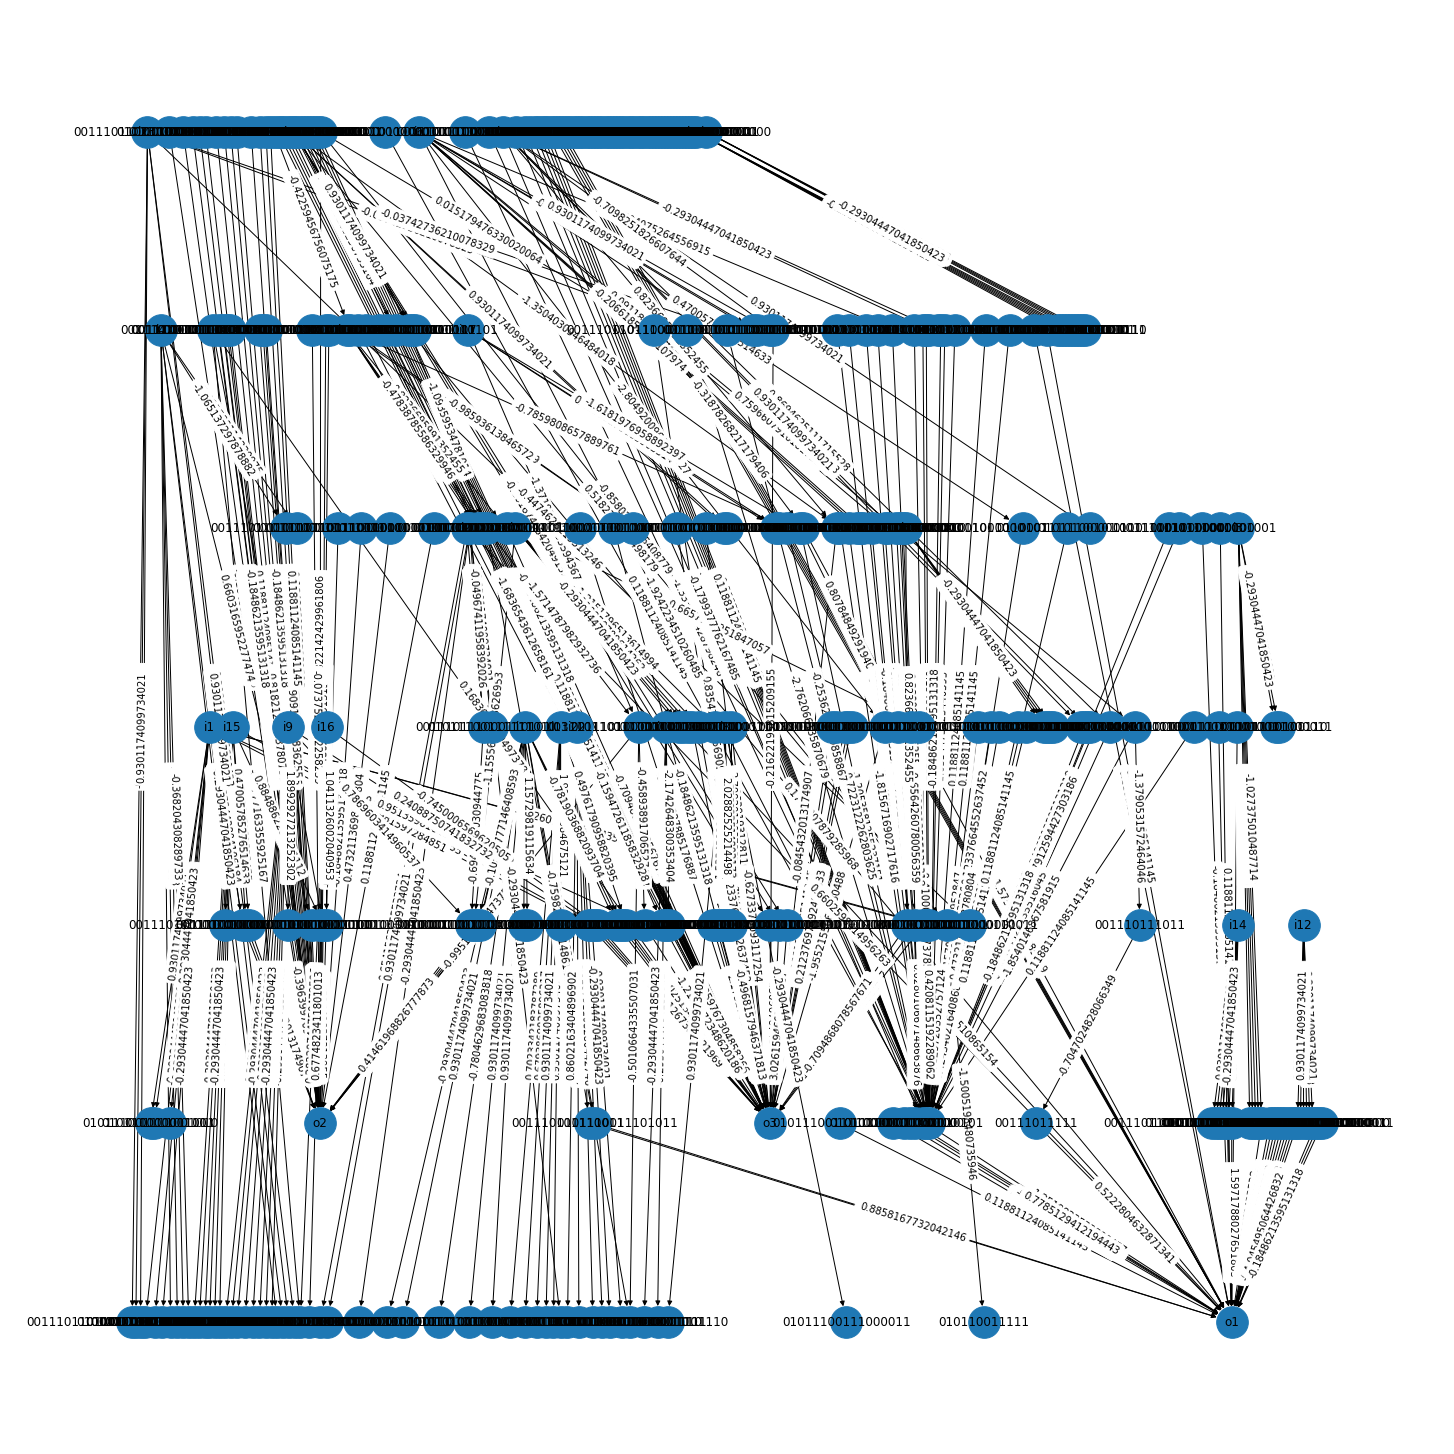

In [33]:
r2.execute()
v2.draw_nn()

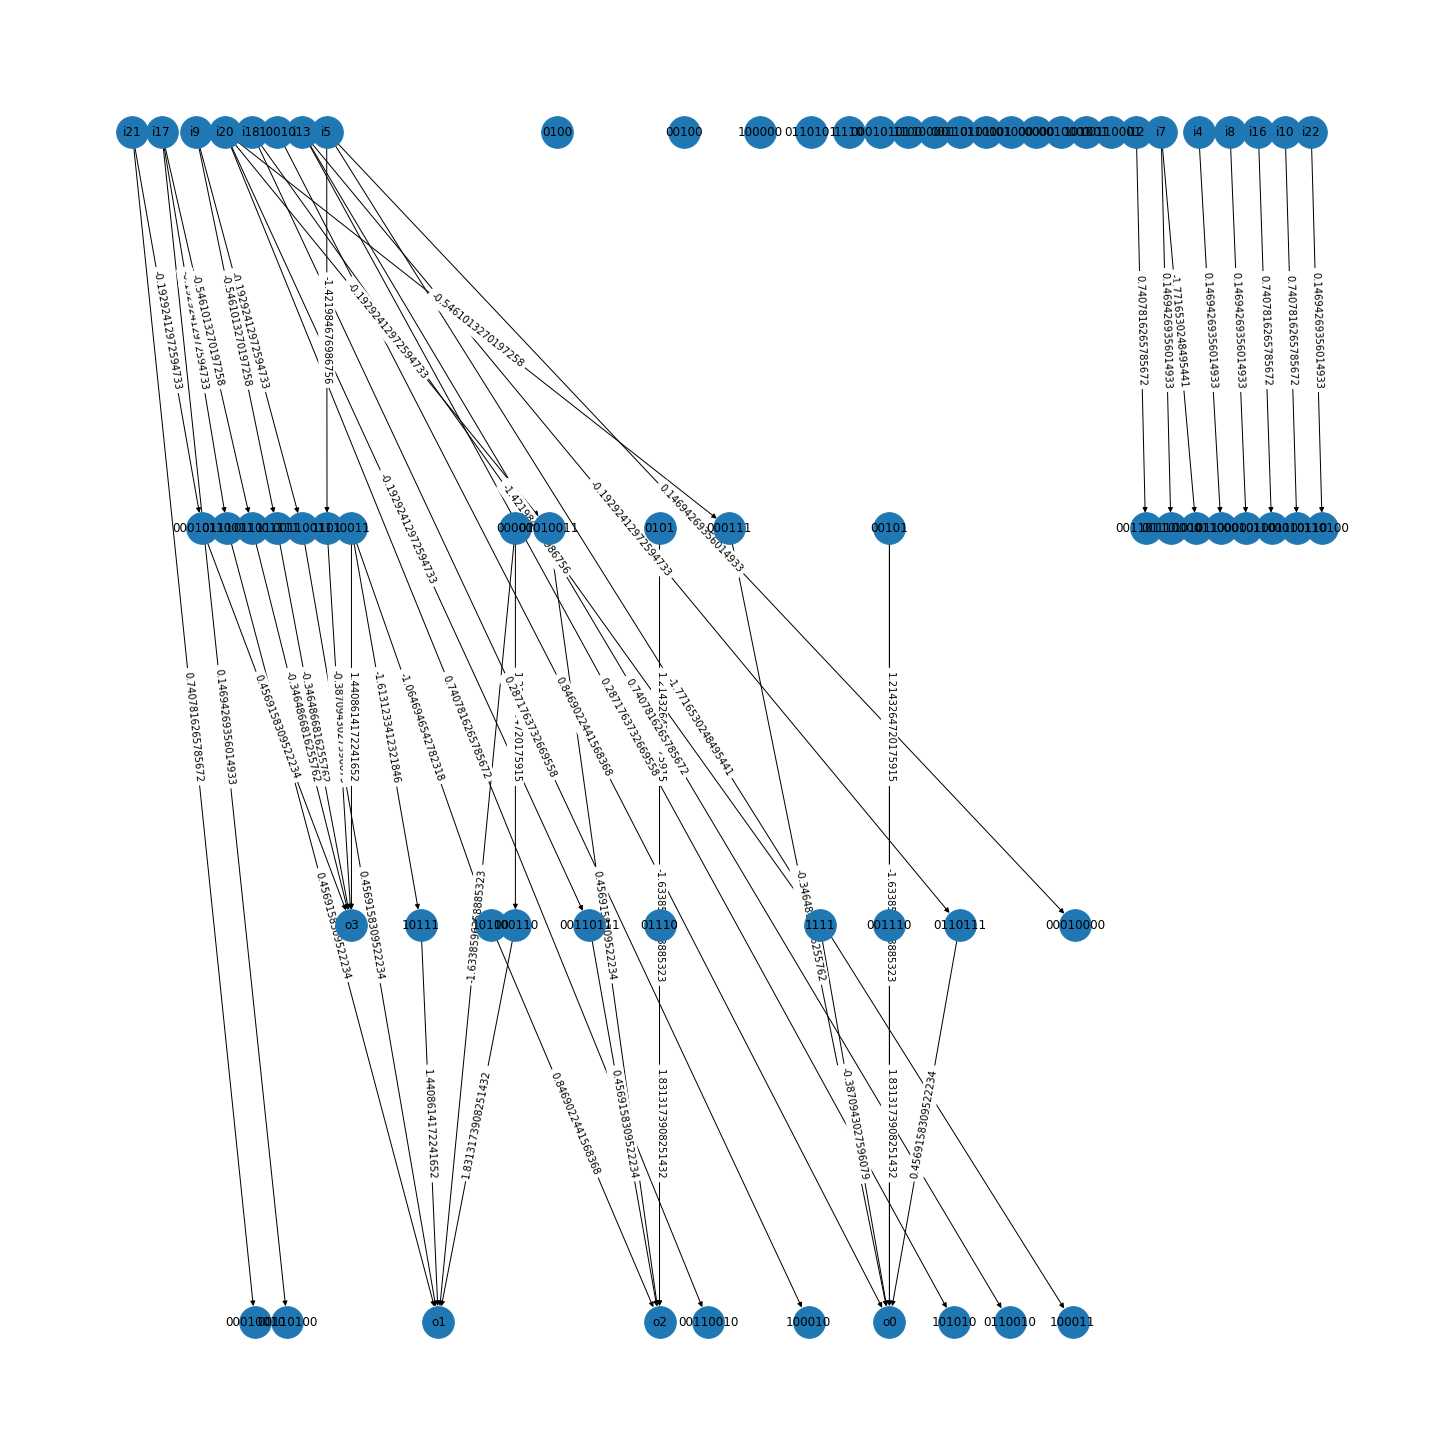

In [17]:
r2.execute()
v2.draw_nn()